# Import packages

In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Read data

In [40]:
df = pd.read_csv("glass.csv",header=None)

In [41]:
df.columns = ['Id', 'RI', 'Na', 'Mg','Al',
'Si', 'K', 'Ca', 'Ba','Fe', 'Type']

In [42]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Visualizations

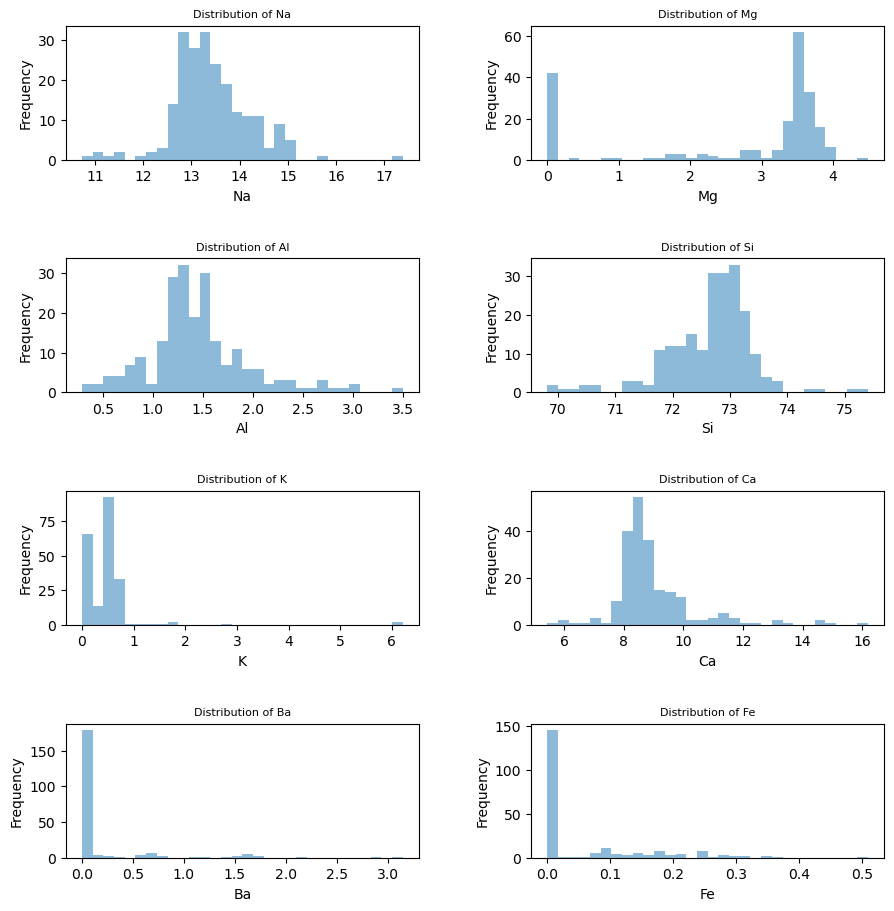

In [43]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=4, ncols=2)
fig.tight_layout(pad=5.0)

features = ['Na', 'Mg','Al', 'Si', 'K', 'Ca', 'Ba','Fe']
for col in range(len(features)): 
    ax = plt.subplot(4,2, col+1)

    plt.hist(df[features[col]], bins=30, alpha=0.5)
    plt.xlabel(features[col])
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {features[col]}',fontdict={'size':8})
plt.show()

In [44]:

fig = px.scatter(df, x="Si", y="Mg", color="Type",
                 size='Al')
fig.show()

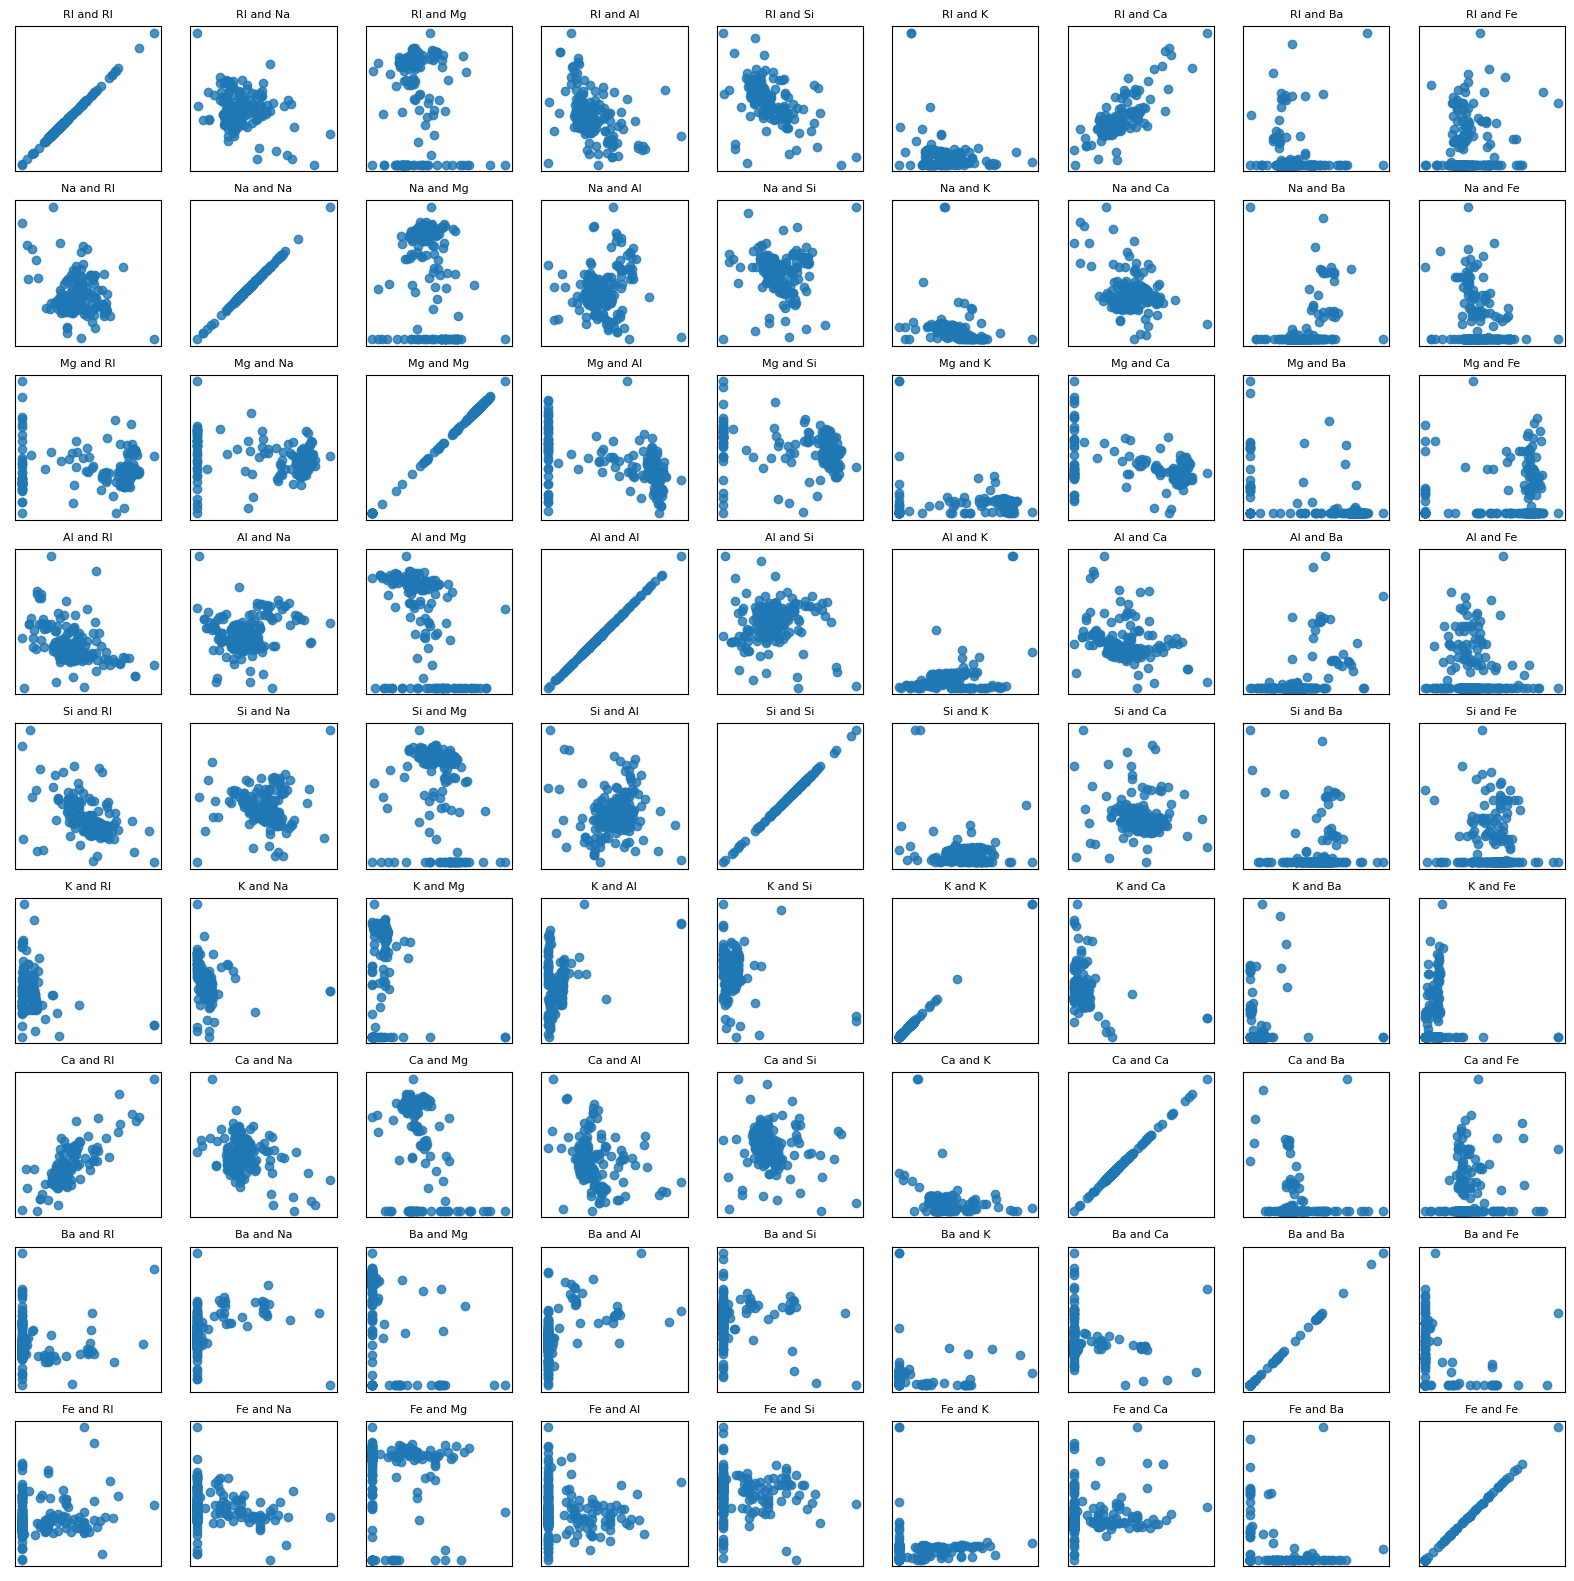

In [45]:
fig = plt.figure(figsize=(20, 20))
plt.title("Scatterplots of all features")
cont_cols = ['RI', 'Na', 'Mg','Al',
'Si', 'K', 'Ca', 'Ba','Fe']
fig.subplots(nrows=len(cont_cols), ncols=len(cont_cols))

for feat_i in range(len(cont_cols)): 
    for feat_j in range(len(cont_cols)):  
        ax = plt.subplot(len(cont_cols),len(cont_cols),len(cont_cols)*feat_i + feat_j+1)
        plt.scatter(df[cont_cols[feat_i]], df[cont_cols[feat_j]], alpha=.8)
        plt.xticks(())
        plt.yticks(())
        plt.title(cont_cols[feat_i] + " and "+ cont_cols[feat_j],fontdict={'size':8})
plt.show()

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.iloc[:,:-1])


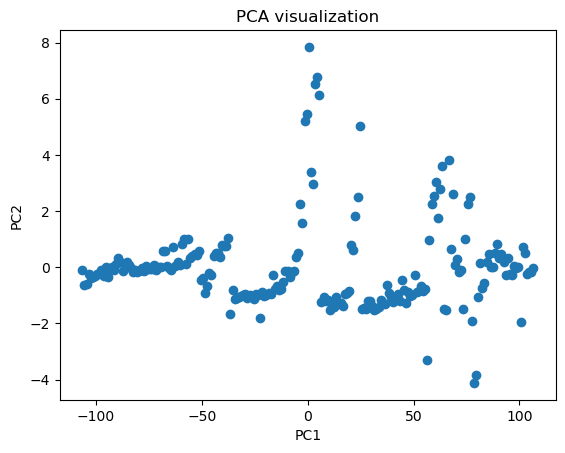

In [47]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA visualization')
plt.show()

In [48]:
df_corr = df.corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr)
    )
)


# Classification

In [49]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [50]:
X = df.iloc[:,:-1]

In [51]:
Y = df.iloc[:,-1]

In [52]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [53]:
X_train, X_test, Y_train, Y_test =train_test_split( X, Y, test_size=0.2)

In [54]:
Y_train

154    3
171    5
76     2
71     2
82     2
      ..
18     1
4      1
7      1
89     2
205    7
Name: Type, Length: 171, dtype: int64

## LDA

In [55]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, Y_train) 
y_pred = lda.predict(X_test) 
accuracy = np.round(np.sum(Y_test == y_pred)/len(Y_test),3)
print("LDA accuracy for the dataset", accuracy) 

LDA accuracy for the dataset 0.953


## Naive Bayes

In [56]:

gnb = GaussianNB() 
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(Y_test == y_pred)/len(Y_test),3)
print("Naive Bayes accuracy for the dataset", accuracy)

Naive Bayes accuracy for the dataset 0.884


## QDA

In [57]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train) 
y_pred = qda.predict(X_test) 
accuracy = np.round(np.sum(Y_test == y_pred)/len(Y_test),3)
print("QDA accuracy for the dataset", accuracy) 

QDA accuracy for the dataset 0.767


c:\Users\AnaMarija Atanasoska\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear



LDA претпоставува дека влезните податоци се нормално дистрибуирани и дека варијансата на секоја класа е иста, QDA претпоставува дека се исто влезните податоци нормално дистрибуирани, но дозволува класите да имаат нивна варијанса, па LDA е помалку осетлива во однос overfitting. Можеме да видиме дека дел од претпоставките за LDA се точни, па затоа LDA има подобар перформанс. Во однос на тоа зошто LDA има подобар перформанс од наивниот Баесов класификатор, тоа е поради тоа што ја зема во предвид коваријансата, за разлика од Баесовиот класификатор кој претпоставува дека влезните карактеристики се независни